<a href="https://colab.research.google.com/github/lmateo707/nfl2021_BigDataBowl/blob/main/playsWithBoth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [ ]:
import re
import math
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm import tqdm

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plays_with_both.csv to plays_with_both.csv


In [ ]:
plays = pd.read_csv("plays_with_both.csv")

In [ ]:
plays.head(2)

,Unnamed: 0,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,target,coverOne,coverTwo
0,0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,Julio Jones,Malcolm Jenkins,NaN
1,1,2018090600,146,"(13:10) M.Ryan pass incomplete short right to C.Ridley (J.Mills, J.Hicks).",1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,Calvin Ridley,Jalen Mills,Jordan Hicks


**What are the most successful/unsuccessful target-cover pair?**

In [ ]:
nan = np.nan
playsWithPair = plays.query("target!='-'")
playsWithPair = playsWithPair[~playsWithPair.coverOne.isna()]
playsWithPair = playsWithPair.reset_index(drop=True)
print(str(round(100.0*len(playsWithPair)/len(plays), 1))+"%")

80.1%


In [ ]:
playsWithPair.head(2)

,Unnamed: 0,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,target,coverOne,coverTwo
0,0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,Julio Jones,Malcolm Jenkins,NaN
1,1,2018090600,146,"(13:10) M.Ryan pass incomplete short right to C.Ridley (J.Mills, J.Hicks).",1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,Calvin Ridley,Jalen Mills,Jordan Hicks


In [ ]:
coverTwoExists = playsWithPair[~playsWithPair.coverTwo.isna()]
target = pd.concat([playsWithPair.target, coverTwoExists.target])
cover = pd.concat([playsWithPair.coverOne, coverTwoExists.coverTwo])
passResult = pd.concat([playsWithPair.passResult, coverTwoExists.passResult])
pairResult = pd.DataFrame()
pairResult = pairResult.assign(target=target, cover=cover, passResult=passResult)
pairResult = pairResult.reset_index(drop=True)
pairResult.head(10)

,target,cover,passResult
0,Julio Jones,Malcolm Jenkins,C
1,Calvin Ridley,Jalen Mills,I
2,Devonta Freeman,Jalen Mills,I
3,Julio Jones,Ronald Darby,C
4,Devonta Freeman,Ronald Darby,I
5,Nelson Agholor,Robert Alford,C
6,Darren Sproles,Ricardo Allen,I
7,Mohamed Sanu,Ricardo Allen,I
8,Tevin Coleman,Rodney McLeod,C
9,Austin Hooper,Nate Gerry,C


In [ ]:
pairResult.query("passResult=='C'").groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)

passResult
target              cover                         
Davante Adams       Xavier Rhodes               12
Julio Jones         Eli Apple                    9
Christian McCaffrey De'Vondre Campbell           7
Adam Humphries      Captain Munnerlyn            7
Stefon Diggs        Prince Amukamara             7
...                                            ...
Geronimo Allison    Adrian Amos                  1
Gerald Everett      Tramaine Brock               1
                    Sherrick McManis             1
                    Quandre Diggs                1
Jonnu Smith         Denzel Perryman              1

[8684 rows x 1 columns]

In [ ]:
pairCompletion= pairResult.query("passResult=='C'").groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)
pairTotal = pairResult.groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)
pairTotal = pairTotal.assign(completionRate=pairCompletion.passResult.divide(pairTotal.passResult, fill_value=0.0))
pairTotal.query("passResult > 7").sort_values(['passResult','completionRate'], ascending=[False, True])

,,passResult,completionRate
target,cover,,
Davante Adams,Xavier Rhodes,14,0.857143
Odell Beckham,James Bradberry,10,0.500000
Julio Jones,Eli Apple,10,0.900000
Antonio Brown,Denzel Ward,9,0.555556
T.Y. Hilton,Jalen Ramsey,8,0.625000
Mike Evans,James Bradberry,8,0.625000
DeAndre Hopkins,Jalen Ramsey,8,0.625000
Michael Thomas,Lavonte David,8,0.875000
Adam Humphries,Captain Munnerlyn,8,0.875000


**What are the most successful covers?**

In [ ]:
pairIncompletion = pairResult.query("passResult!='C'").groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = pairResult.groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = pairTotal.assign(incompletionRate=pairIncompletion.passResult.divide(pairTotal.passResult, fill_value=0.0)).drop('target', axis=1)
pairTotal = pairTotal.rename(columns={'passResult':'coverCount'})[["incompletionRate", "coverCount"]]
pairTotal = pairTotal.sort_values(['coverCount', 'incompletionRate'], ascending=[False, True])
pairTotal.head(10)

,incompletionRate,coverCount
cover,,
James Bradberry,0.419048,105
Eli Apple,0.352941,102
Adoree' Jackson,0.326733,101
Tremaine Edmunds,0.340206,97
Darius Leonard,0.252632,95
Jamal Adams,0.389474,95
Tyrann Mathieu,0.250000,92
Prince Amukamara,0.336957,92
Shawn Williams,0.307692,91


In [ ]:
# What is the average completion rate in the league

print("Mean Incompletion Rate:\t" + str(round(pairTotal.incompletionRate.mean(),3)))
print("Mean Cover Count:\t" + str(round(pairTotal.coverCount.mean(), 1)))

Mean Incompletion Rate:	0.304
Mean Cover Count:	31.3


Index(['Terrell Suggs', 'Darius Slay', 'Za'Darius Smith', 'Stephon Gilmore',
       'James Bradberry', 'Marlon Humphrey', 'Kyle Fuller'],
      dtype='object', name='cover')


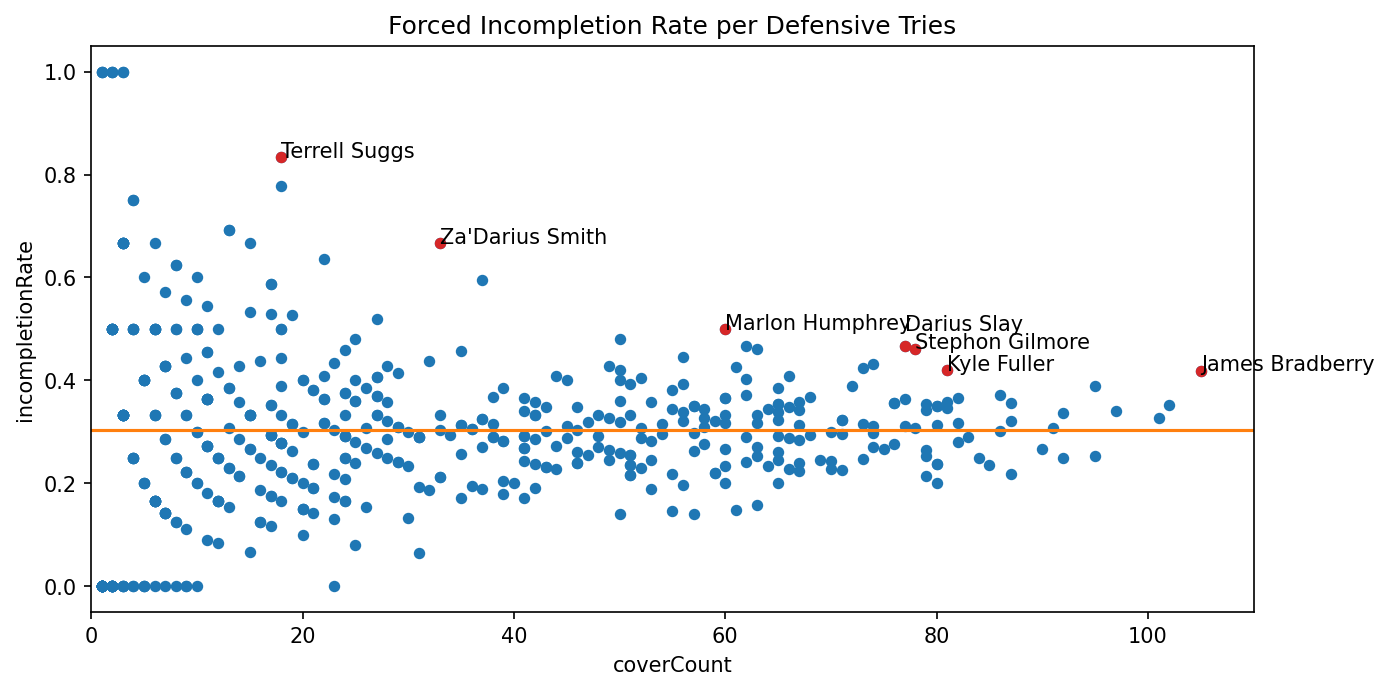

In [ ]:
# Plot for ease of use

plt.close('all')
ax = pairTotal.plot.scatter(x='coverCount', y='incompletionRate', figsize=(10,5))
plt.plot([-10,130], [pairTotal.incompletionRate.mean(), pairTotal.incompletionRate.mean()], c='C1')

# Finding the players on the edges
tempX = np.arange(0,110,1)
tempY = np.exp(-0.03 * (tempX+10))+0.6
#plt.plot(tempX, tempY, c='C2')

tempDistToLine = []
for i in range(len(pairTotal)):
    p = pairTotal.iloc[i]
    minDist = 100000000
    for j in range(len(tempX)):
        tempdist = math.sqrt((p.coverCount-j)**2+(p.incompletionRate-tempY[j])**2)
        minDist = min(minDist, tempdist)
    tempDistToLine.append(minDist)
temp = pairTotal.assign(dist=tempDistToLine)
edge_points = temp.sort_values('dist', ascending=True)[:7]
edge_points.plot.scatter(x='coverCount', y='incompletionRate',c='C3', ax=ax)
for i in range(len(edge_points)):
    p = edge_points.iloc[i]
    name = edge_points.index[i]
    if 'Darius Slay' in name:
        plt.text(x=p.coverCount, y=p.incompletionRate+0.03, s=name)
    else:   
        plt.text(x=p.coverCount, y=p.incompletionRate, s=name)
print(edge_points.index)


plt.xlim([0, 110])
plt.ylim([-.05, 1.05])
plt.title("Forced Incompletion Rate per Defensive Tries")
plt.show()

In [ ]:
edge_points.drop('dist', axis=1).sort_values('coverCount', ascending=False)

,incompletionRate,coverCount
cover,,
James Bradberry,0.419048,105
Kyle Fuller,0.419753,81
Stephon Gilmore,0.461538,78
Darius Slay,0.467532,77
Marlon Humphrey,0.500000,60
Za'Darius Smith,0.666667,33
Terrell Suggs,0.833333,18


In [ ]:
# Save DataFrame to csv for Tableau

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
playsWithPair.to_csv('playsWithPair.csv')
!cp playsWithPair.csv "drive/My Drive/"

In [ ]:
list(playsWithPair.columns)

['Unnamed: 0',
 'gameId',
 'playId',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'possessionTeam',
 'playType',
 'yardlineSide',
 'yardlineNumber',
 'offenseFormation',
 'personnelO',
 'defendersInTheBox',
 'numberOfPassRushers',
 'personnelD',
 'typeDropback',
 'preSnapVisitorScore',
 'preSnapHomeScore',
 'gameClock',
 'absoluteYardlineNumber',
 'penaltyCodes',
 'penaltyJerseyNumbers',
 'passResult',
 'offensePlayResult',
 'playResult',
 'epa',
 'isDefensivePI',
 'target',
 'coverOne',
 'coverTwo']